<a href="https://colab.research.google.com/github/Pranavthimmaiah/Online-Retail-Customer-Segmentation/blob/main/Pranav_Thimmaiah_Team_4_Capstone_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_excel('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Online Retail.xlsx')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.dropna(inplace=True)

In [9]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [11]:
df.shape

(406829, 8)

In [12]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [13]:
df=df[~df['InvoiceNo'].str.contains('C')]

In [14]:
df.shape

(397924, 8)

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [16]:
df.shape

(397924, 8)

In [17]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#**Exploratory data analysis**

In [18]:
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


In [19]:
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


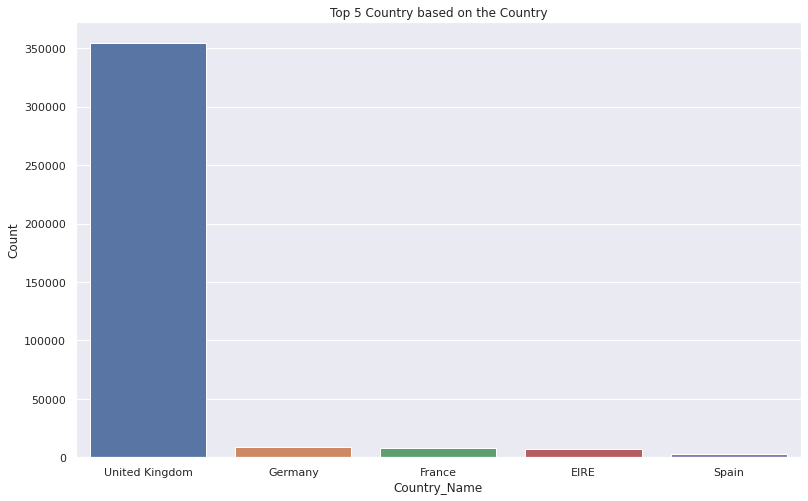

In [20]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based on the Country')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

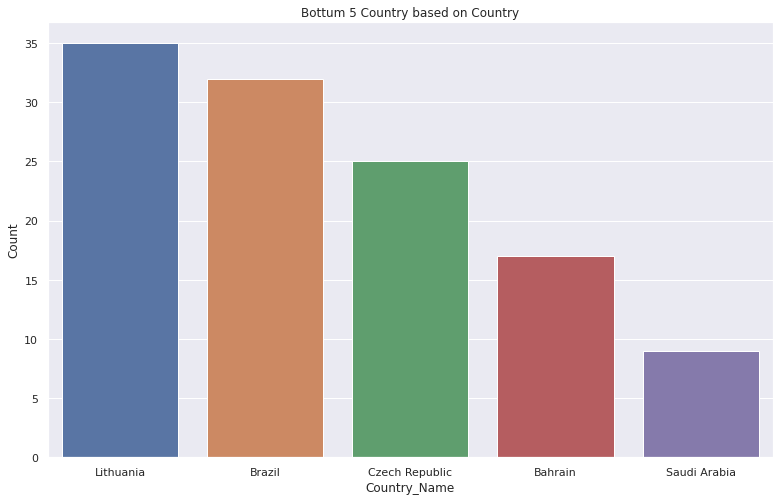

In [21]:
plt.figure(figsize=(13,8))
plt.title('Bottum 5 Country based on Country')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

In [22]:
df[df['Country']=='Saudi Arabia']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2011-02-24 10:34:00,0.42,12565.0,Saudi Arabia
100811,544838,22363,GLASS JAR MARMALADE,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2011-02-24 10:34:00,5.49,12565.0,Saudi Arabia
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2011-02-24 10:34:00,1.45,12565.0,Saudi Arabia


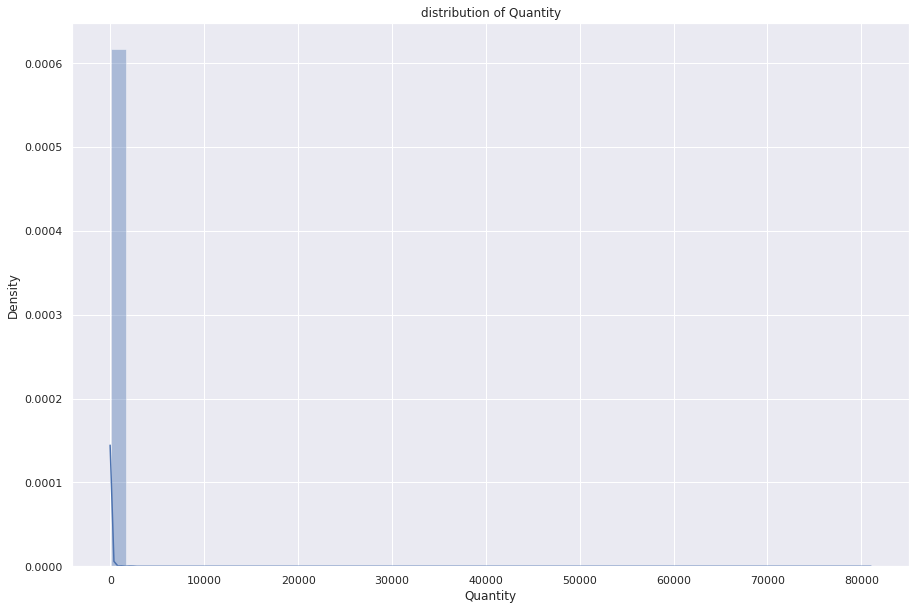

In [23]:

plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="B")

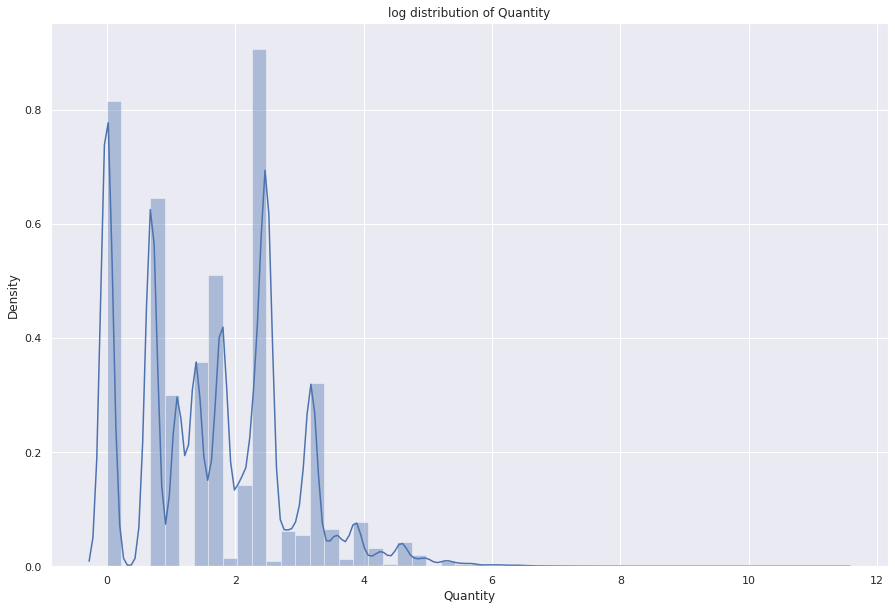

In [24]:

plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

In [25]:
df['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

In [26]:
df=df[df['Quantity']>=1]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


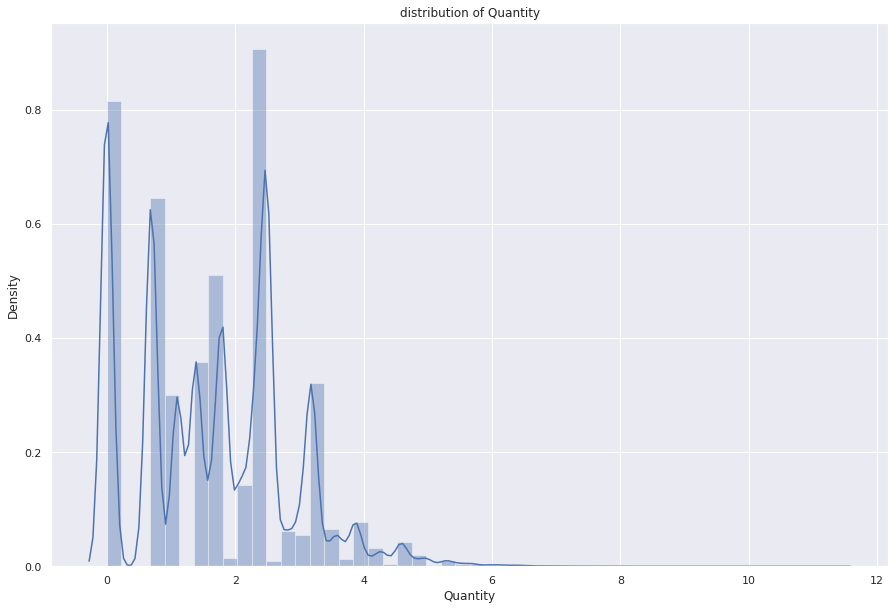

In [28]:

plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

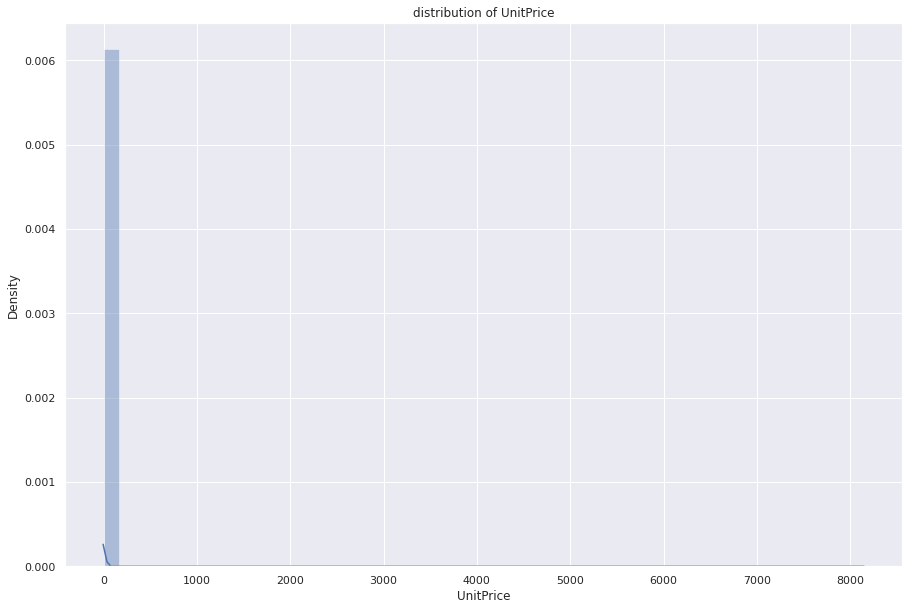

In [29]:

plt.figure(figsize=(15,10))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B")

In [30]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [31]:
df=df[df['UnitPrice']>0]

In [32]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#**Feature engineering**

In [33]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [34]:
df['Day']=df['InvoiceDate'].dt.day_name()

In [35]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [36]:
df['Amount']=df['Quantity']*df['UnitPrice']

In [37]:
df['Month']=df['InvoiceDate'].dt.month_name()

In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute,Amount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December


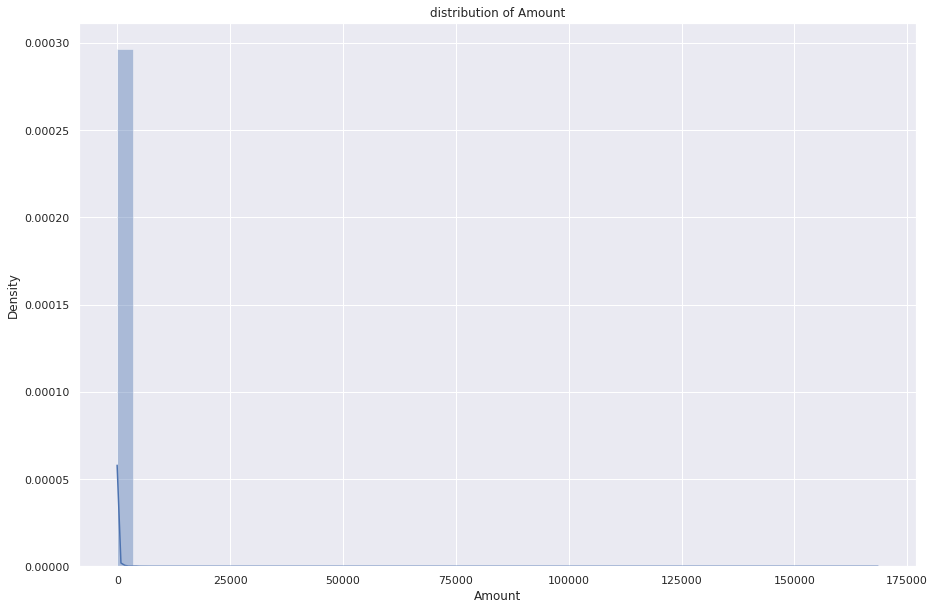

In [39]:

plt.figure(figsize=(15,10))
plt.title('distribution of Amount')
sns.distplot(df['Amount'],color="B")

In [40]:
df['Amount'].describe()

count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: Amount, dtype: float64

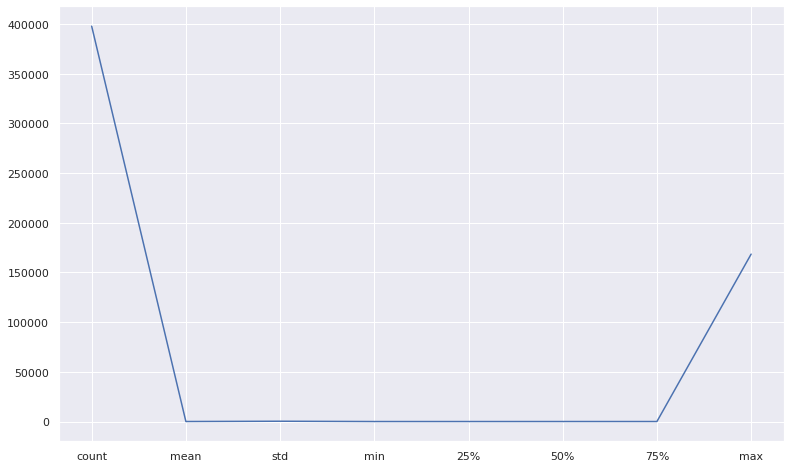

In [41]:
plt.figure(figsize=(13,8))
df['Amount'].describe().plot()

In [42]:
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


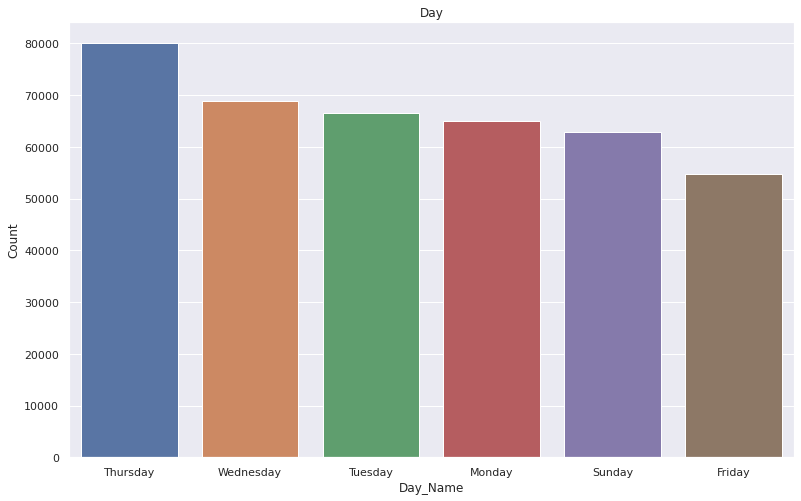

In [43]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

In [44]:
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


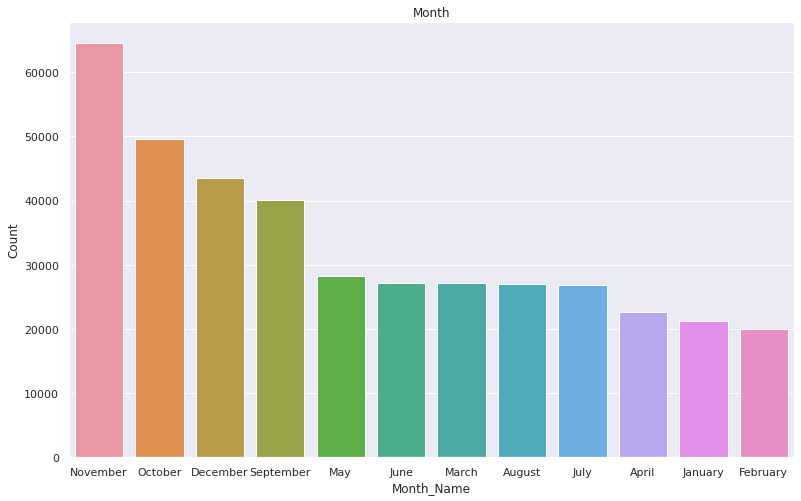

In [45]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

In [46]:
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,72065
1,13,64026
2,14,54118
3,11,49084
4,15,45369
5,10,37997
6,16,24089
7,9,21944
8,17,13071
9,8,8690


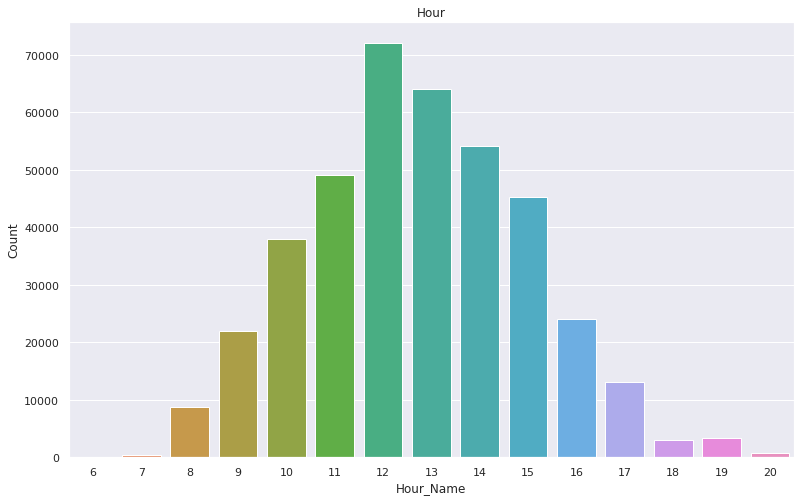

In [47]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

In [48]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [49]:
df['Time_type']=df['hour'].apply(time_type)

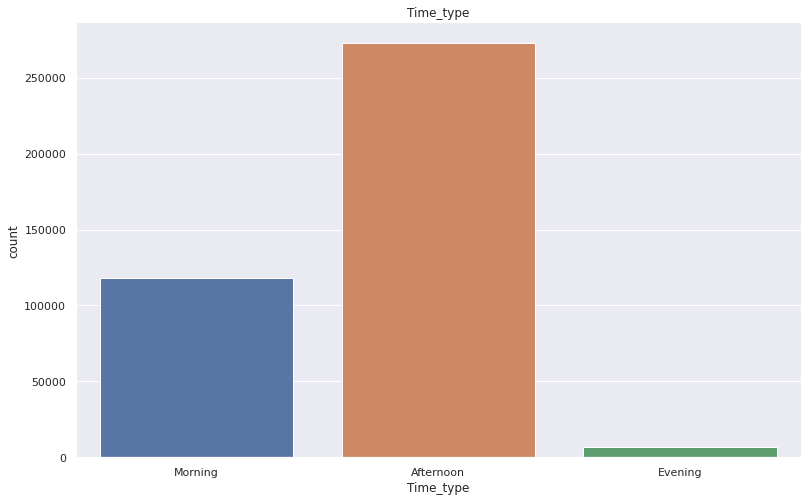

In [50]:
plt.figure(figsize=(13,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
import string
from nltk.corpus import stopwords

In [53]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [55]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute,Amount,Month,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,15.30,December,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,22.00,December,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December,Morning


##**Let us write a function which removes punctuation and stopwords from our data**

In [56]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [57]:
df['Tokenized_Description'] = df['Description'].apply(text_process)

In [58]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Tokenized_Description'])

In [59]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
print(vectorizer.get_feature_names())

['10', '11', '12', '120cm', '125g', '15', '15c', '15cm', '16', '16x16cm', '17080', '18m', '18pc', '20', '200', '20light', '21', '23', '24', '250g', '25w', '25x24x12cm', '30', '30cm', '30cmx30cm', '34x20cm', '35', '35g', '36', '3d', '40', '40cm', '40x40cm', '42neckl', '45cm', '45x30cm', '45x45cm', '50', '500g', '50cm', '50s', '60', '60cm', '60x40cm', '65cmx65cm', '6pc', '70s', '72', '75', '78', 'a4', 'a5', 'a6', 'a7', 'abc', 'abstract', 'acapulco', 'account', 'acrylic', 'address', 'ade', 'adult', 'advent', 'afghan', 'aged', 'ahoy', 'aid', 'air', 'airline', 'airmail', 'alarm', 'album', 'allium', 'alphabet', 'alpine', 'aluminium', 'amber', 'amelie', 'amethyst', 'anemone', 'angel', 'angelpink', 'angels', 'animal', 'animals', 'ant', 'antique', 'antoienett', 'antoinette', 'aperitif', 'apothecary', 'apple', 'apples', 'apron', 'aqua', 'area', 'army', 'art', 'articulated', 'artificial', 'artiifcial', 'artonly', 'ashtray', 'ashtrayrevolutionary', 'ass', 'assorted', 'asst', 'asstd', 'babushka', '